In [12]:
%load_ext autoreload
%autoreload 2
import sys
from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-04-18 15:58:47,129 | INFO     |: info
2024-04-18 15:58:47,130 | WARNING  |: warning
2024-04-18 15:58:47,131 | ERROR    |: error
2024-04-18 15:58:47,132 | CRITICAL |: critical


In [13]:
# Get ArtemisBLEController object
ble = get_ble_controller()
# Connect to the Artemis Device
ble.connect()

2024-04-18 15:58:47,674 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:89:c1:6d:24:4b
2024-04-18 15:58:53,357 | INFO     |: Connected to c0:89:c1:6d:24:4b


In [14]:
ble.send_command(CMD.ECHO, "HiHello")
output1 = ble.receive_string(ble.uuid['RX_STRING'])
print(output1)

Robot says -> HiHello :)


In [15]:
raw_message=[]
#add more arrays if needed
num = []
timeIMU = [] #in seconds
yaw = []
def clear_data():
    # Clear all the sensor data arrays
    timeIMU.clear()
    yaw.clear()
def notification_handler(uuid, byte_array):
    global timeIMU,xAcc,yAcc,zAcc,xGyr,yGyr,zGyr
    raw_message.append(byte_array)
    message = ble.bytearray_to_string(byte_array)
    if message=='IMU data received.':
        print(message)
    else: 
        readings = message.split('|')
        num.clear()
        for reading in readings:
            label, value = reading.split(':')
            num.append(float(value))
        if len(num)==2:
            if label=="Yaw":
                timeIMU.append(num[0]/1000000)
                yaw.append(num[1])

In [16]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [18]:
clear_data()
ble.send_command(CMD.GET_ANGLE, "")

IMU data received.


In [19]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [20]:
print(f"It takes: {round(timeIMU[-1]-timeIMU[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(timeIMU)/(timeIMU[-1]-timeIMU[0]))} samples/s.")

It takes: 4.999s to collect data.
Sample rate is about 277 samples/s.


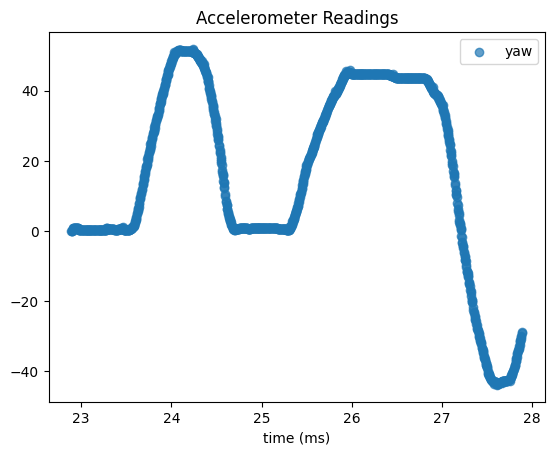

2024-04-18 17:05:57,224 | INFO     |: Disconnected from C0:89:C1:6D:24:4B


In [22]:
plt.scatter(timeIMU, yaw, label = 'yaw', alpha=0.7)
plt.xlabel('time (ms)')
plt.title('Accelerometer Readings')
plt.legend();

In [10]:
ble.stop_notify(ble.uuid['RX_STRING'])

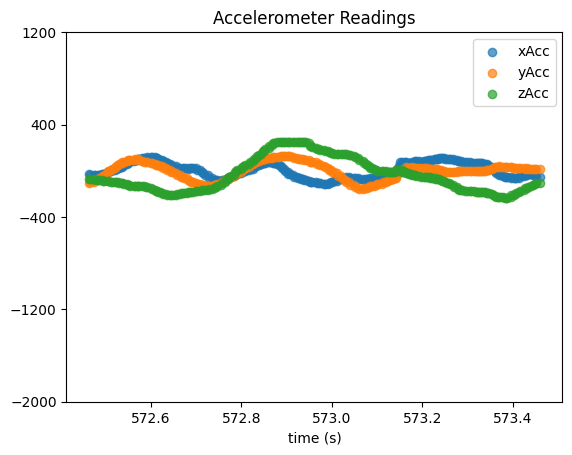

In [29]:
plt.scatter(timeIMU, xGyr, label = 'xAcc', alpha=0.7)
plt.scatter(timeIMU, yGyr, label = 'yAcc', alpha=0.7)
plt.scatter(timeIMU, zGyr, label = 'zAcc', alpha=0.7)
plt.xlabel('time (s)')
plt.title('Accelerometer Readings')
plt.yticks(np.arange(-2000, 2000, step=800));
plt.legend();

In [16]:
# Disconnect
ble.disconnect()

2024-03-10 15:23:36,134 | INFO     |: Disconnected from C0:89:C1:6D:24:4B


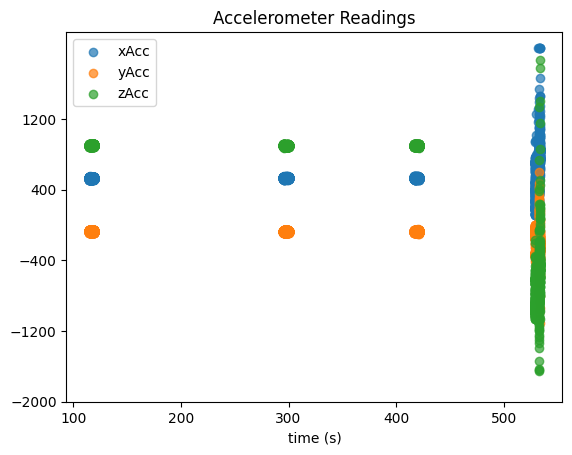

In [38]:
plt.scatter(time, xAcc, label = 'xAcc', alpha=0.7)
plt.scatter(time, yAcc, label = 'yAcc', alpha=0.7)
plt.scatter(time, zAcc, label = 'zAcc', alpha=0.7)
plt.xlabel('time (s)')
plt.title('Accelerometer Readings')
plt.yticks(np.arange(-2000, 2000, step=800));
plt.legend();

In [30]:
x = ble.bytearray_to_string(raw_message[0])
m=x.split('|')
for reading in m:
    label, value = reading.split(':')
    print(label)
m

Time
Yaw


['Time:22891786.0', 'Yaw:0.0']

In [ ]:
raw_message=[]
#add more arrays if needed
num = []
timeIMU = [] #in seconds
pitch = [] 
roll = []
yaw = []
def clear_data():
    # Clear all the sensor data arrays
    timeIMU.clear()
    pitch.clear()
    roll.clear()
    yaw.clear()
def notification_handler(uuid, byte_array):
    global timeIMU,xAcc,yAcc,zAcc,xGyr,yGyr,zGyr
    raw_message.append(byte_array)
    message = ble.bytearray_to_string(byte_array)
    if message=='IMU data received.':
        print(message)
    else: 
        readings = message.split('|')
        num.clear()
        for reading in readings:
            label, value = reading.split(':')
            num.append(float(value))
        if len(num)==2:
            if label=="Yaw":
                timeIMU.append(num[0]/1000000)
                pitch.append(num[1])
                roll.append(num[2])
                yaw.append(num[3])